# <font color=blue size="10">Analyze fit tuning curves of "E"</font>

We use the functional form (__"Carandini Form"__) from Ayaz et al. (2013) (https://www.ncbi.nlm.nih.gov/pubmed/23664971) to fit the bandwidth tuning curves

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tqdm
from importlib import reload
#from tuning_curve_fit_funcs import carandini_fit_wStats
import tuning_curve_fit_funcs as tcfits
import tuning_curve_feature_plotting as tcfplot
reload(tcfits)
reload(tcfplot)

<module 'tuning_curve_feature_plotting' from '/Users/yashar/Google-Drive/Documents/Work/Projects/AuditoryContextualModul/Matlab/tuning_curve_feature_plotting.py'>

In [2]:
DATA_DIR = '/Users/yashar/Google-Drive/Documents/Work/Projects/AuditoryContextualModul/Matlab/Lakunina-Jaramillo-Data/'
filename = 'photoidentified_cells_responsesTCs_new.npz'
data = np.load(DATA_DIR + filename)
print("\n".join(data.keys())) #:gives the list of arrays in the file
data.close()

PVonsetResponses
PVsustainedResponses
SOMonsetResponses
SOMsustainedResponses
PVsustainedBaselineSpikeRates
ACsustainedResponses
stimulusBandwidth
AConsetBaselineSpikeRates
AConsetResponses
PVonsetBaselineSpikeRates
SOMsustainedBaselineSpikeRates
ACsustainedBaselineSpikeRates
SOMonsetBaselineSpikeRates


In [3]:
BLisZeroBW = True #whether to replace pure tone evoked rates with baseline (spontaneous) rates
WNoctave = 6 #what BW (in octaves) to attribute to white noise stimulus

# Fitting unindentified (thus majority excitatory) AC cells

In [4]:
#fit all "excitatory" cells 
Celltype = 'AC'
CelltypeLabel = '"excitatory"'
Response_type = 'sustained'

StatsList, ParamsList, GOFlist, fitTCs, rawTCs, test_BWs, Bandwidths, Baselines =\
     tcfits.FitAllCells(DATA_DIR + filename, Celltype, Response_type, BLisZeroBW,\
                             WNoctave,  mFixed=True, function_class_fit= "diff_of_gauss_fit")
    
ACfeatures = tcfits.makeFeaturesDict(GOFlist,StatsList,ParamsList,rawTCs,fitTCs,\
                                     Bandwidths,test_BWs,Baselines,BLisZeroBW,Celltype,Response_type)

  0%|          | 0/120 [00:00<?, ?it/s]/Users/yashar/Google-Drive/Documents/Work/Projects/AuditoryContextualModul/Matlab/tuning_curve_fit_funcs.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  Stats['SuppInd'] = 1 - Stats['wnResp']/Stats['maxResp']
100%|██████████| 120/120 [00:11<00:00, 10.22it/s]


 Elapsed time was 11.7409 seconds


### Goodness of fit

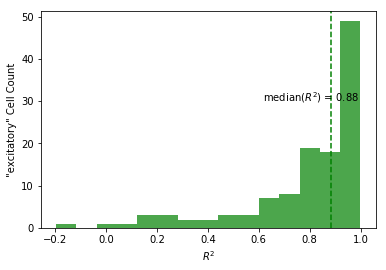

In [5]:
TCfeatures = eval(Celltype+'features')

%matplotlib inline

R2 = TCfeatures['GoF']['R2']
R2Label = TCfeatures['GoFLabels']['R2']
#fig = plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(R2, 15, facecolor='g',alpha=0.7)
plt.axvline(x=np.median(R2),c='g',linestyle='--')
plt.xlabel(R2Label)
plt.ylabel(CelltypeLabel+ ' Cell Count')
plt.text(np.median(R2)*.7, 30, 'median('+R2Label+') = %1.2f' % np.median(R2))
#plt.axis([40, 160, 0, 0.03])
#plt.grid(True)
plt.show()

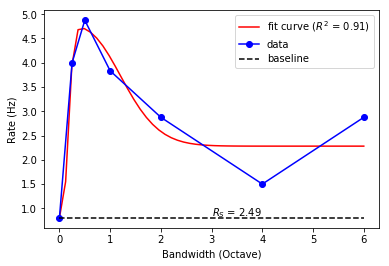

In [ ]:
#visualize all fits, from worse to best
import pylab as pl
from IPython import display

R2inds = np.argsort(R2)
for cel in R2inds[:]:
    pl.clf()
    baseline = TCfeatures['Baselines'][cel]
    pl.plot(test_BWs, baseline + TCfeatures['fitTCs'][:,cel],'r-',label='fit curve ('+R2Label+' = %1.2f)' % R2[cel])
    pl.plot(Bandwidths, baseline + TCfeatures['rawTCs'][:,cel],'bo-',label='data')
    pl.plot(Bandwidths, baseline*(1+0*Bandwidths),'k--',label='baseline')
    pl.xlabel('Bandwidth (Octave)')
    pl.ylabel('Rate (Hz)')
    pl.legend()
#     xs1 = np.asarray(pl.gca().get_xlim())
#     ys1 = np.asarray(pl.gca().get_ylim())
#     pl.text(xs1[0] + .5 * np.diff(xs1),ys1[0] + .6 * np.diff(ys1),'$R^2$ = %1.2f' % R2[R2inds])
    pl.text(3,baseline*1.05,'$R_S$ = %1.2f' % TCfeatures['CarandiniParams']['RS'][cel])
    
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(.25)
    if TCfeatures['CarandiniParams']['RS'][cel] > 19:
        time.sleep(.25)

In [ ]:
TCfeaturesToPlot = TCfeatures['MiscParams'].copy()#copying dictionary
TCfeaturesToPlot['R2'] = TCfeatures['GoF']['R2'] #adding R^2
TCparamNames = TCfeatures['MiscParamsNames'][:] #copying list
TCparamNames.insert(0,'R2')#'R2' is first name in list
print(" , ".join(TCparamNames))
ParamsLabels = TCfeatures['MiscParamsLabels'].copy()#copying dictionary
ParamsLabels['R2'] = TCfeatures['GoFLabels']['R2']

betterOrder = [10,1,4,3,2,7,5,9,11,12,8,6]
ylist = range(1,12+1)
pairs = [[0, betterOrder[k-1]] for k in ylist] 
tcfplot.makeScatterPlots(TCfeaturesToPlot, TCparamNames, ParamsLabels, pairs,figsize=(13,10),cols=4,wspace=.4,linecolor='r')

del(TCfeaturesToPlot,ParamsLabels,TCparamNames)

<style type="text/css">
body  {
   background-color:#E8E2E8;
};
</style>
<font color=#dd8010 size="4">
So there seems to be a weak relationship: cells with stronger response/rate have better fits

In [ ]:
TCfeaturesToPlot = TCfeatures['CarandiniParams'].copy()#copying dictionary
TCfeaturesToPlot['R2'] = TCfeatures['GoF']['R2'] #adding R^2
TCparamNames = TCfeatures['CarandiniParamsNames'][:] #copying list
TCparamNames.insert(0,'R2')#'R2' is first name in list
print(" , ".join(TCparamNames))
ParamsLabels = TCfeatures['CarandiniParamsLabels'].copy()#copying dictionary
ParamsLabels['R2'] = TCfeatures['GoFLabels']['R2']

#betterOrder = [10,1,4,3,2,7,5,9,11,12,8,6]
ylist = range(1,6)
betterOrder = ylist
pairs = [[0, betterOrder[k-1]] for k in ylist] 
tcfplot.makeScatterPlots(TCfeaturesToPlot, TCparamNames, ParamsLabels, pairs,figsize=(13,8),cols=3,wspace=.3,linecolor='r')

del(TCfeaturesToPlot,ParamsLabels,TCparamNames)

## Tuning curve feature distributions

In [ ]:
TCfeatures = eval(Celltype+'features')

TCfeaturesToPlot = TCfeatures['MiscParams']
TCparamNames = TCfeatures['MiscParamsNames']
ParamsLabels = TCfeatures['MiscParamsLabels']
print(" , ".join(TCparamNames))

In [ ]:
%matplotlib inline

betterOrder = [10,1,4,3,2,7,5,9,11,12,8,6]
tcfplot.makeHistograms(TCfeaturesToPlot, TCparamNames,ParamsLabels, CelltypeLabel,betterOrder)

#### Correlations of preferred BW with other quantities:

In [ ]:
pairs = [(5,1),(6,1),(8,1),(9,1),(10,1),(3,1)]
pairs = [[betterOrder[i-1]-1 for i in p] for p in pairs] 
tcfplot.makeScatterPlots(TCfeaturesToPlot, TCparamNames, ParamsLabels, pairs,uniformYs=True,figsize=(15,10))

#### Correlations of *Suppression Index* with other quantities:

In [ ]:
pairs = [(5,3),(6,3),(8,3),(9,3),(10,3),(1,3)]
pairs = [[betterOrder[i-1]-1 for i in p] for p in pairs] 
tcfplot.makeScatterPlots(TCfeaturesToPlot, TCparamNames, ParamsLabels, pairs,uniformYs=True,figsize=(15,10))

#### Correlations of rates and responses (not interesting)

In [ ]:
inds = range(5,13) #for rates
pairs = [(j,i) for i in inds for j in inds]
pairs = [[betterOrder[i-1]-1 for i in p] for p in pairs] 
tcfplot.makeScatterPlots(TCfeaturesToPlot, TCparamNames, ParamsLabels, \
                 pairs,cols=len(inds),figsize=(27/1.5,23/1.5),hspace=.4,wspace=.4,uniformYs=True,symm=True)

## Carandini parameters

In [ ]:
TCfeatures = eval(Celltype+'features')

TCfeaturesToPlot = TCfeatures['CarandiniParams']
TCparamNames = TCfeatures['CarandiniParamsNames']
ParamsLabels = TCfeatures['CarandiniParamsLabels']
print(" , ".join(TCparamNames))

In [ ]:
%matplotlib inline

betterOrder = list(range(1,7))
tcfplot.makeHistograms(TCfeaturesToPlot, TCparamNames,ParamsLabels, CelltypeLabel,betterOrder,figsize=(8,10))

In [ ]:
inds = range(5)
pairs = [(j,i) for i in inds for j in inds]
#pairs = [[betterOrder[i-1]-1 for i in p] for p in pairs] 
tcfplot.makeScatterPlots(TCfeaturesToPlot, TCparamNames, ParamsLabels, \
                 pairs,cols=len(inds),figsize=(14,14),hspace=.4,wspace=.4,symm=True)